In [2]:
import cv2
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def show_image(image, title="Image", cmap_type="gray"):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

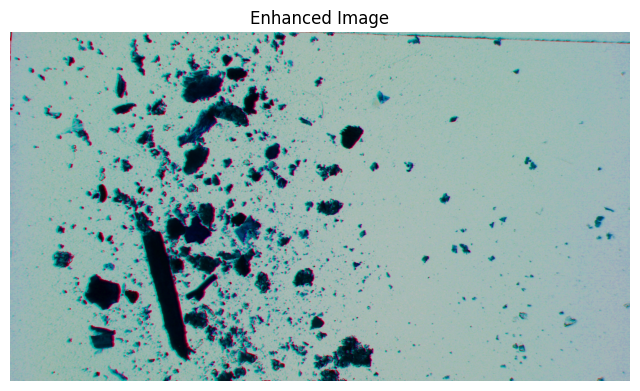

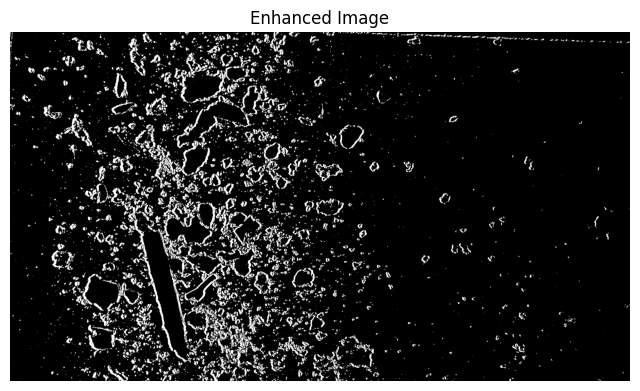

Number of grains: 7327


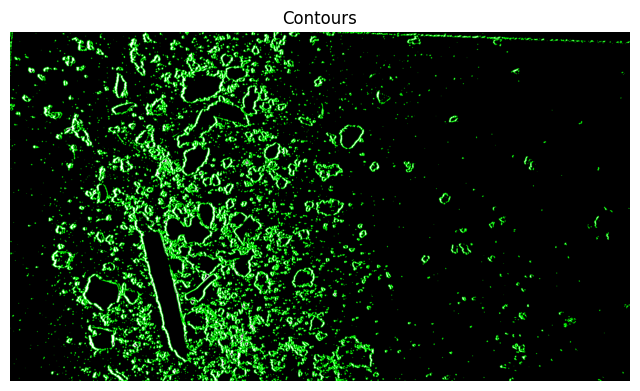

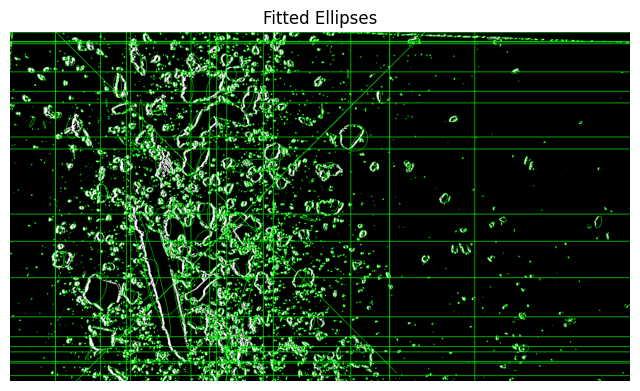

Minimum distances across each grain: [0.009697928131238953, 0.016343659610665646, 0.013007773881266758, 0.015156844736908844, 0.00997462372599374, 0.013142035170253582, 0.01531127810293857, 0.015048052264954882, 0.007754177112942156, 0.012341596734594777, 0.008649170822531325, 0.012510084973211143, 0.01606644680701827, 0.0874779065138128, 0.0336675417006114, 0.020165226815771993, 0.025391965000722844, 0.01494829513468032, 0.015113518259604242, 0.03689027031035121, 0.01933509724084386, 0.03666193188659012, 0.014991097891469579, 0.02230176651855058, 0.024262764034812583, 0.006870890370822893, 0.008296014823232318, 0.045067078716391144, 0.02100471452282148, 0.02387190480956818, 0.018695267050043967, 0.011165377201281537, 0.01883625670579359, 0.03869405678836536, 0.009812047110601152, 0.017346189049018326, 0.00021115002168009566, 0.011162444180349267, 0.03846403278454424, 0.009013537045507714, 0.0380591363611178, 0.009857458237417082, 0.027537250743084433, 0.007383550429809035, 0.023477412

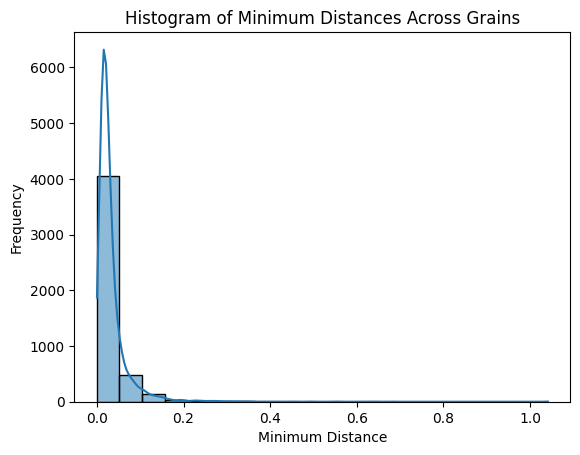

In [8]:


calibration_factor = 0.0039016750486215255

def count_grains(path):
    # Load the image
    image = cv2.imread(path)
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Increase the saturation by 200%
    hsv_image[:, :, 1] = cv2.multiply(hsv_image[:, :, 1], 4)
    
    # Convert the image back to BGR color space
    image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    show_image(image, title="Enhanced Image")

    # Define the color ranges for cyan and red in HSV
    # Define the color ranges for mint green (cyan) and hot pink (red) in HSV
    lower_cyan = (30, 100, 100)  # Mint green lower bound
    upper_cyan = (85, 255, 255)  # Mint green upper bound
    lower_red = (130, 50, 50)  # Further adjusted hot pink lower bound
    upper_red = (200, 255, 255)  # Adjusted hot pink upper bound

    # Create masks for cyan and red
    mask_cyan = cv2.inRange(hsv_image, lower_cyan, upper_cyan)
    mask_red = cv2.inRange(hsv_image, lower_red, upper_red)
    # Combine the masks
    mask = cv2.bitwise_or(mask_cyan, mask_red)

    # Create an output image where the masked areas are white and the rest are black
    output_image = cv2.bitwise_and(image, image, mask=mask)
    output_image[mask == 0] = [0, 0, 0]
    output_image[mask != 0] = [255, 255, 255]

    # Update the image to the output image
    image = output_image

    show_image(image, title="Enhanced Image")

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find contours in the image
    contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count the number of contours (grains)
    num_grains = len(contours)

    print(f"Number of grains: {num_grains}")

    # Optionally, draw the contours on the original image for visualization
    contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
    show_image(contour_image, title="Contours")

    # Fit ellipses to each contour and calculate the minimum distance across each grain
    min_distances = []
    for contour in contours:
        if len(contour) >= 5:  # Fit ellipse requires at least 5 points
            ellipse = cv2.fitEllipse(contour)
            (x, y), (MA, ma), angle = ellipse
            min_distance = min(MA, ma) * calibration_factor
            min_distances.append(min_distance)
    
    

    print(f"Minimum distances across each grain: {min_distances}")

    # Plot a histogram of the minimum distances
    sns.histplot(min_distances, bins=20, kde=True)
    plt.title("Histogram of Minimum Distances Across Grains")
    plt.xlabel("Minimum Distance")
    plt.ylabel("Frequency")
    plt.show()

    

count_grains("data/233801-240125052635.jpg")
